In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('bbc-text.csv')

In [3]:
data

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [26]:
import tensorflow
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [27]:
len(train_data)

8982

In [28]:
len(test_data)

2246

In [29]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [30]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [31]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [32]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [40]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [80]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(34, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [81]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [82]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [83]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=10,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 3s 336us/sample - loss: 2.8010 - acc: 0.4543 - val_loss: 2.0133 - val_acc: 0.6360
Epoch 2/10
7982/7982 [==============================] - 2s 230us/sample - loss: 1.5945 - acc: 0.6874 - val_loss: 1.4244 - val_acc: 0.6940
Epoch 3/10
7982/7982 [==============================] - 2s 227us/sample - loss: 1.1295 - acc: 0.7645 - val_loss: 1.1894 - val_acc: 0.7390
Epoch 4/10
7982/7982 [==============================] - 2s 227us/sample - loss: 0.8902 - acc: 0.8137 - val_loss: 1.0685 - val_acc: 0.7770
Epoch 5/10
7982/7982 [==============================] - 2s 230us/sample - loss: 0.7221 - acc: 0.8504 - val_loss: 1.0011 - val_acc: 0.7930
Epoch 6/10
7982/7982 [==============================] - 2s 231us/sample - loss: 0.5922 - acc: 0.8776 - val_loss: 0.9439 - val_acc: 0.8110
Epoch 7/10
7982/7982 [==============================] - 2s 223us/sample - loss: 0.4845 - acc: 0.9002 - val_loss: 0.9629 - va

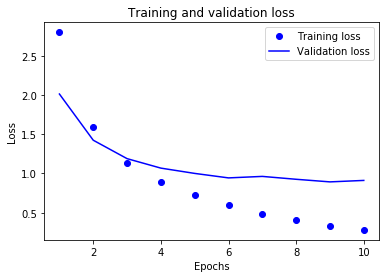

In [84]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

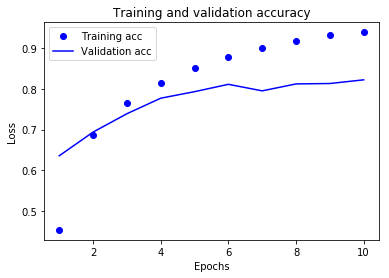

In [85]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [86]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 317us/sample - loss: 2.7456 - acc: 0.4897 - val_loss: 1.8168 - val_acc: 0.6250
Epoch 2/9
7982/7982 [==============================] - 2s 257us/sample - loss: 1.4828 - acc: 0.7002 - val_loss: 1.3405 - val_acc: 0.7140
Epoch 3/9
7982/7982 [==============================] - 2s 233us/sample - loss: 1.0816 - acc: 0.7752 - val_loss: 1.1319 - val_acc: 0.7570
Epoch 4/9
7982/7982 [==============================] - 2s 230us/sample - loss: 0.8482 - acc: 0.8201 - val_loss: 1.0550 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 2s 250us/sample - loss: 0.6750 - acc: 0.8587 - val_loss: 0.9998 - val_acc: 0.7910
Epoch 6/9
7982/7982 [==============================] - 2s 231us/sample - loss: 0.5415 - acc: 0.8851 - val_loss: 0.9383 - val_acc: 0.7980
Epoch 7/9
7982/7982 [==============================] - 2s 231us/sample - loss: 0.4319 - acc: 0.9090 - val_loss: 0.9322 - val_acc: 

In [87]:
results

[0.9898127072216248, 0.7871772]

In [88]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19590382902938558

In [90]:
import os
# Any results you write to the current directory are saved as output.
import itertools
import os

get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
layers = keras.layers
models = keras.models


# In[2]:


data = pd.read_csv('bbc-text.csv')


# In[3]:


data.head()


# In[4]:


train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))


# In[13]:


def train_test_split(data, train_size):
    train = data[:train_size]
    test = data[train_size:]
    return train, test


# In[14]:


train_label, test_label = train_test_split(data['category'], train_size)
train_text, test_text = train_test_split(data['text'], train_size)


# In[15]:


import tensorflow
max_words = 1000
tokenize = tensorflow.keras.preprocessing.text.Tokenizer(num_words=max_words, char_level=False)


# In[ ]:





# In[17]:


tokenize.fit_on_texts(train_text) # fit tokenizer to our training text data
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)


# In[18]:


encoder = LabelEncoder()
encoder.fit(train_label)
y_train = encoder.transform(train_label)
y_test = encoder.transform(test_label)


# In[19]:


num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# In[20]:


print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


# In[21]:


batch_size = 35
epochs = 30
model = models.Sequential()
model.add(layers.Dense(150, input_shape=(max_words,)))
model.add(layers.Dense(140, activation='relu'))
model.add(layers.Dense(130, activation='relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


# In[22]:


history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs)


# In[ ]:






Train size: 1780
Test size: 445
x_train shape: (1780, 1000)
x_test shape: (445, 1000)
y_train shape: (1780, 5)
y_test shape: (445, 5)
Epoch 1/30
1780/1780 [==============================] - 1s 612us/sample - loss: 0.5217 - acc: 0.8281
Epoch 2/30
1780/1780 [==============================] - 0s 230us/sample - loss: 0.0520 - acc: 0.9860
Epoch 3/30
1780/1780 [==============================] - 0s 184us/sample - loss: 0.0148 - acc: 0.9966
Epoch 4/30
1780/1780 [==============================] - 0s 184us/sample - loss: 0.0031 - acc: 1.0000
Epoch 5/30
1780/1780 [==============================] - 0s 176us/sample - loss: 0.0012 - acc: 1.0000
Epoch 6/30
1780/1780 [==============================] - 0s 187us/sample - loss: 7.6233e-04 - acc: 1.0000
Epoch 7/30
1780/1780 [==============================] - 0s 195us/sample - loss: 5.3462e-04 - acc: 1.0000
Epoch 8/30
1780/1780 [==============================] - 0s 182us/sample - loss: 4.0033e-04 - acc: 1.0000
Epoch 9/30
1780/1780 [========================

# alag kaam !!!


In [92]:
import itertools

In [94]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
layers = keras.layers
models = keras.models

In [96]:
train_size = int(len(data) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

def train_test_split(data, train_size):
    train = data[:train_size]
    test = data[train_size:]
    return train, test


Train size: 1557
Test size: 668


In [97]:
train_label, test_label = train_test_split(data['category'], train_size)
train_text, test_text = train_test_split(data['text'], train_size)